### create a dictionary, filename as key, dataframes as data

In [113]:
import pandas as pd
data_files = ['ap_2010.csv','class_size.csv','demographics.csv','graduation.csv','hs_directory.csv','sat_results.csv']
data = {}
for file in data_files:
    d = pd.read_csv(file)
    key = file.replace('.csv','')
    data[key] = d
data

{'ap_2010':         DBN                                         SchoolName  \
 0    01M448                       UNIVERSITY NEIGHBORHOOD H.S.   
 1    01M450                             EAST SIDE COMMUNITY HS   
 2    01M515                                LOWER EASTSIDE PREP   
 3    01M539                     NEW EXPLORATIONS SCI,TECH,MATH   
 4    02M296              High School of Hospitality Management   
 5    02M298                                   Pace High School   
 6    02M300  Urban Assembly School of Design and Construction,   
 7    02M303                         Facing History School, The   
 8    02M305  Urban Assembly Academy of Government and Law, The   
 9    02M308                       Lower Manhattan Arts Academy   
 10   02M400                       HS FOR ENVIRONMENTAL STUDIES   
 11   02M408                       PROFESSIONAL PERFORMING ARTS   
 12   02M411                           BARUCH COLLEGE CAMPUS HS   
 13   02M412                       NYC LAB HS FOR C

### Read the other two 'survey' dataset and combine them

In [114]:
all_survey = pd.read_csv('survey_all.txt',delimiter='\t',encoding = 'windows-1252')
d75_survey = pd.read_csv('survey_d75.txt',delimiter ='\t', encoding = 'windows-1252')
survey = pd.concat([all_survey, d75_survey],axis = 0)
# ⚠️axis = 0 上下连接
survey.head(5)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


### Uppercase column name & Select certain columns & add to dictionary

In [115]:
survey['DBN'] = survey['dbn']
survey = survey.loc[:,["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]]
data['survey'] = survey 
survey.head(1)    

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9


### Exploring All Datasets and Preprocessing Further

In [116]:
for key in data:
    print(data[key].head(1))

      DBN                    SchoolName AP Test Takers  Total Exams Taken  \
0  01M448  UNIVERSITY NEIGHBORHOOD H.S.              39                49   

  Number of Exams with scores 3 4 or 5  
0                                   10  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  
0                   19.0         ATS                             NaN  
      DBN                       N

### Inserting DBN Fields

In [117]:
# Rename the column 'dbn' in hs_directory dataset
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

In [118]:
# class_size data does not have 'DBN' column, instead, we could combine 'CSD' and 'SCHOOL CODE' to get a 'DBN' column
# first we should pad one-digit 'CSD' to two-digits
def pad_csd(num):
    string = str(num)
    if len(str(num)) >1:
        return string
    else:
        return string.zfill(2)
# ⚠️zfill函数在前面加0，变为两位数(argument is '2')  
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

# Next, we combine the two 'string' columns
#⚠️string的‘+’是直接首尾，改成numeric之后，就是相加
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


###  Combining the SAT Scores

In [119]:
#⚠️ 如上所说，只有先转换为numeric, +才是数字相加，否则是文字首尾想连，所以用了pd.to_numeric()
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'],errors= 'coerce')
data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'],errors= 'coerce')
data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'],errors= 'coerce')

data['sat_results']['sat_score'] = data['sat_results']['SAT Math Avg. Score']+data['sat_results']['SAT Critical Reading Avg. Score']+data['sat_results']['SAT Writing Avg. Score'] 

print(data['sat_results']['sat_score'].head())

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


### Parsing Geographic Coordinates for Schools

In [120]:
# Location 1 column里面的位置信息类似1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)，需要提取出lat 和 lon部分

# Extracting the Latitude
import re
def mystring(string):
    coordinates = re.findall('\(.+\)',string)
    latitude = coordinates[0].split(',')[0].replace('(','')
    return latitude

# ⚠️re.findall返回的是一个list,所以需要coordinates[0], 转变成一个string，才能split#
data['hs_directory']['lat']=data['hs_directory']['Location 1'].apply(mystring)
        
# Extracting the Longitude
def mystring(string):
    coordinates = re.findall('\(.+\)',string)
    longitude = coordinates[0].split(',')[1].replace(')','')
    return longitude

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(mystring)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")
#⚠️errors,而不是error, errors ='coerce' to handle missing values properly.
#⚠️split, replace出来的lat/lon 都是string type,要用于drawcircle或者basemap scatter plot都需要转换为numeric, 所以pd.to_numeric

### Condensing the Class Size Dataset

In [121]:
class_size = data['class_size']
#⚠️先从dictionary提取出dataframe出来再filter,condense
class_size = class_size[class_size['GRADE '] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

### Computing Average Class Sizes

In [122]:
import numpy as np
class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace = True)
data['class_size'] = class_size
data['class_size'].head()
#⚠️groupby aggfunc和pivot_table不一样了，在外面，而且np.mean也没有（）
#⚠️groupby后面就是分类条件，其函数作用于其它所有column; 而pivot_table，主要参数是作用column, 分类条件是‘index'&'column'
#⚠️groupby之后会将筛选条件变成index,所以需要重新reset_index一下，我们之前也没有遇到过这种情况，记住

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


### Condensing the Demographics Data Set

In [123]:
data["demographics"] = data["demographics"][data["demographics"]['schoolyear'] ==20112012]

### Condensing the Graduation Data Set

In [124]:
data['graduation'] = data['graduation'][data['graduation']['Cohort'] == '2006']
data['graduation'] = data['graduation'][data['graduation']['Demographic'] == 'Total Cohort']

### Converting AP Test Scores

In [125]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for each in cols:
    data['ap_2010'][each] = pd.to_numeric(data['ap_2010'][each], errors = 'coerce')

### Performing the Left Joins

In [126]:
#⚠️ pd.concat(axis=0,axis=1)是上下连接，和左右相连;
#⚠️ dataframe.merge(how='', on='')是揉合
#⚠️ pd.concat([x,y],axis); combined = df_x.merge(df_y,how,on)
combined = data["sat_results"]
combined = combined.merge(data['ap_2010'], on = 'DBN', how = 'left')
combined = combined.merge(data['graduation'], on = 'DBN', how = 'left')
#⚠️这三个merge都是以sat_results index为主，都是left join
combined.head(5)
combined.shape
#⚠️shape没有（）

(479, 33)

### Performing the Inner Joins

In [127]:
need = ['class_size', 'demographics', 'survey', 'hs_directory']
for each in need:
    combined = combined.merge(data[each], on='DBN', how='inner')
    
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041


### Filling in Missing Values with df.fillna ( )

In [128]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

### Adding a School District Column for Mapping ?????

In [129]:
def get_first_two_chars(dbn):
    return dbn[0:2]
#⚠️这个就是combined['DBN'][0:2],不是这个column变成的series的前两个value嘛？
combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
print(combined["school_dist"].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


### Finding Correlations With the r Value

In [130]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

### Plotting Enrollment With the Plot() Accessor

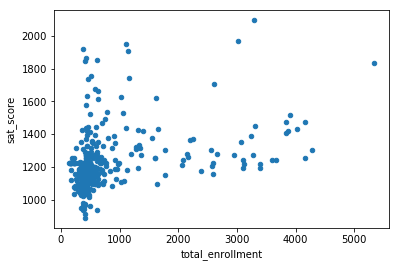

In [131]:
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

### Exploring Schools With Low SAT Scores and Enrollment

In [132]:
combined = combined[combined['total_enrollment']<1000]
low_enrollment = combined[combined['sat_score']<1000]
low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

### Plotting Language Learning Percentage

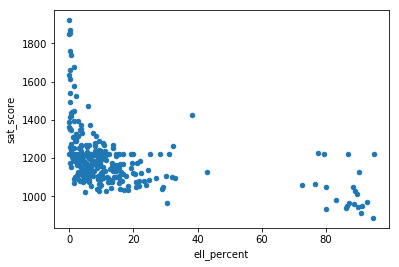

In [133]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

### Mapping the Schools With Basemap

In [134]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

#⚠️ remember these customizing methods
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
#⚠️ 之前pd.to_numeric, 用于basemap,还需要 tolist()
longitudes = combined['lon'].tolist()
latitudes = combined['lat'].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c = combined['ell_percent'] , cmap='summer')
plt.show()
#⚠️ zorder=2 parameter to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
#⚠️ latlon =True  to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
#⚠️ colormap summer to result in green points for low numbers, and yellow points for high numbers.
#⚠️ c argument 就是颜色深浅分类的参考变量

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

### Calculating District-Level Statistics

In [135]:
import numpy 
districts = combined.groupby('school_dist').agg(numpy.mean)
districts.reset_index(inplace = True)
#  Plotting Percent Of English Learners by District
#⚠️先按照districts分类，然后画图
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

### Plotting survey correlations

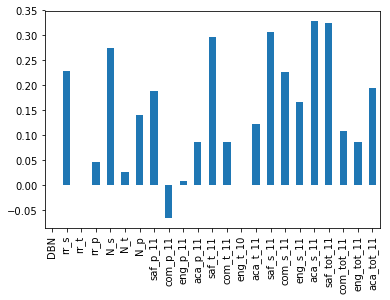

In [136]:
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_10", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
%matplotlib inline
# remember the method
combined.corr()["sat_score"][survey_fields].plot.bar()

### Plotting safety

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
# Temporary bug: if you run the following line of code in the Jupyter Guided Project interface on Dataquest, you'll get an error. 
# We're working on a fix, thanks for your patience! This should work fine locally on your own computer though.
# m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()
#⚠️ marker是按照district分类分布的，c=districts["saf_s_11"]的大小和颜色深浅相关

### Gender differences in SAT scores

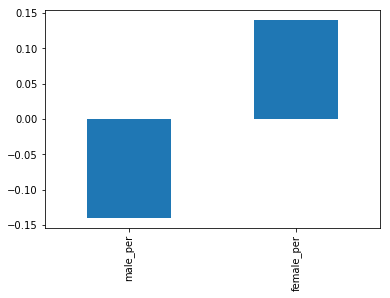

In [137]:
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar()